In [14]:
#Insert the country in which you're interested in separated by a comma
countries = 'Italy'

In [15]:
import pandas as pd
import json
import requests
import tensorflow as tf
from matplotlib import pyplot as plt

In [16]:
#Download DataFrame
who_data_url = "https://pomber.github.io/covid19/timeseries.json"
json_data = requests.get(who_data_url)
world_data = pd.DataFrame.from_dict(json_data.json())

print('Dataset loaded')

Dataset loaded


/Users/mirco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in long_scalars
/Users/mirco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/Users/mirco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in long_scalars
/Users/mirco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/Users/mirco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in long_scalars
/Users/mirco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars


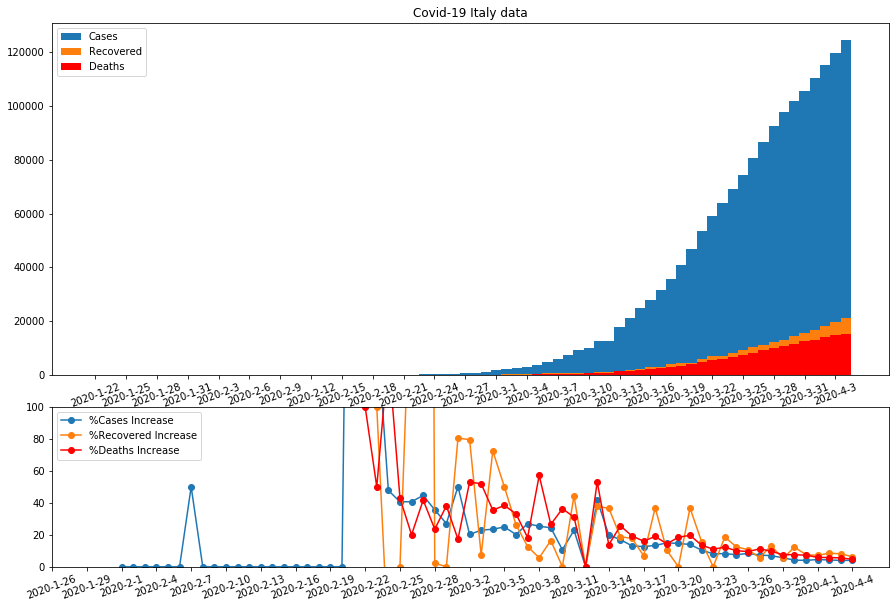

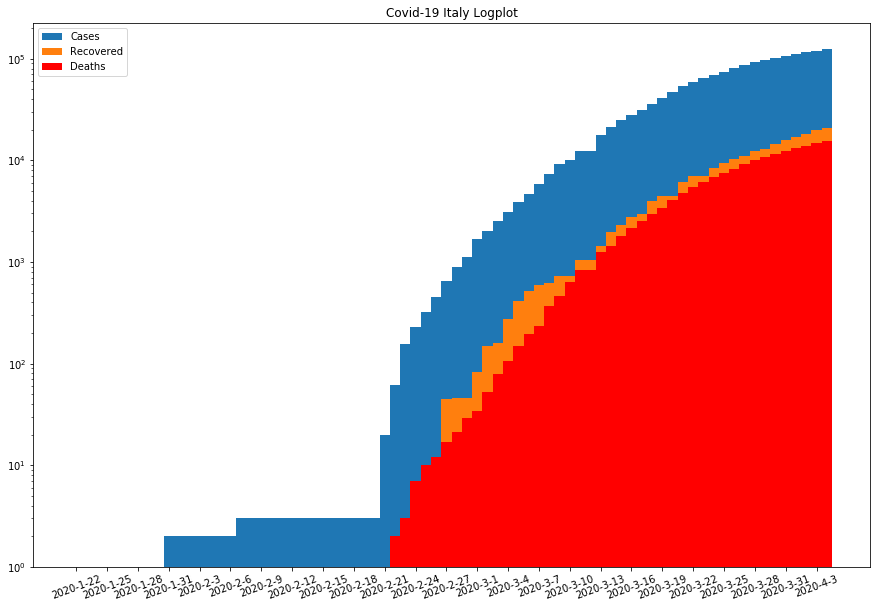

In [17]:
#Refine DataFrame
if type(countries) == str : countries = [countries]
for i in range(len(countries)):
    Desidered_country = countries[i]
    regional_data = world_data[Desidered_country]
    date = []; cases = [];  deaths = [];  recovered = [];
    for i in range(len(regional_data)):
        date.append(regional_data[i]['date'])
        cases.append(regional_data[i]['confirmed'])
        deaths.append(regional_data[i]['deaths'])
        recovered.append(regional_data[i]['recovered'])
    data = {'date' : date,
            'cases' : cases,
            'deaths' : deaths,
            'recovered' : recovered}
    data = pd.DataFrame(data = data)
    
    #Compute Percentage
    perc = pd.DataFrame(columns=['date','cases','recovered','deaths'])
    for i in range(len(data)-1,1,-1):
        #if data['cases'][i-1] > 100 : 
        perc = perc.append({'cases' : ((data['cases'][i] - data['cases'][i-1]) / data['cases'][i-1]) *100,
                            'recovered' : ((data['recovered'][i] - data['recovered'][i-1]) / data['recovered'][i-1]) *100,
                            'deaths' : ((data['deaths'][i] - data['deaths'][i-1]) / data['deaths'][i-1]) *100,
                            'date' : data['date'][i]},
                            ignore_index=True) 
    
    
    #Visualizations (hist)
    fig =plt.figure(figsize=(15, 10))
    grid = plt.GridSpec(nrows=3,ncols=1)
    ax = fig.add_subplot(grid[0:2])
    width = 1
    ax.bar(data['date'], data['cases'], width, label='Cases')
    ax.bar(data['date'], data['recovered'],width, label='Recovered')
    ax.bar(data['date'], data['deaths'], width, label='Deaths',color='red')
    plt.title('Covid-19 '+ Desidered_country + ' data')
    plt.legend()
    plt.legend()
    plt.xticks([data['date'][x] for x in range(0,len(data['date']),3)],rotation=20)
    #Visualizations (percentage)
    ax_p = fig.add_subplot(grid[2])
    ax_p.set_ylim(top=100)
    ax_p.plot(perc['date'][::-1], perc['cases'][::-1], '-o', label='%Cases Increase')
    ax_p.plot(perc['date'][::-1], perc['recovered'][::-1], '-o', label='%Recovered Increase')
    ax_p.plot(perc['date'][::-1], perc['deaths'][::-1], '-o', color='red', label='%Deaths Increase')
    plt.legend(loc='upper left')
    plt.xticks([perc['date'][x] for x in range(0,len(perc['date']),3)],rotation=20)
    plt.show()

    #Logaritmic Plot
    fig =plt.figure(figsize=(15, 10))
    ax = fig.add_subplot()
    ax.bar(data['date'], data['cases'], width, label='Cases')
    ax.bar(data['date'], data['recovered'],width, label='Recovered')
    ax.bar(data['date'], data['deaths'], width, label='Deaths', color='red')
    plt.xticks([data['date'][x] for x in range(0,len(data['date']),3)],rotation=20)
    plt.title('Covid-19 '+ Desidered_country + ' Logplot')
    plt.legend()
    ax.set_yscale('log')
    plt.ylim(bottom=1)
    plt.show()